In [1]:
# from datetime import datetime as dt
# import os 
# import pandas as pd
# import numpy as np
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# :simp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

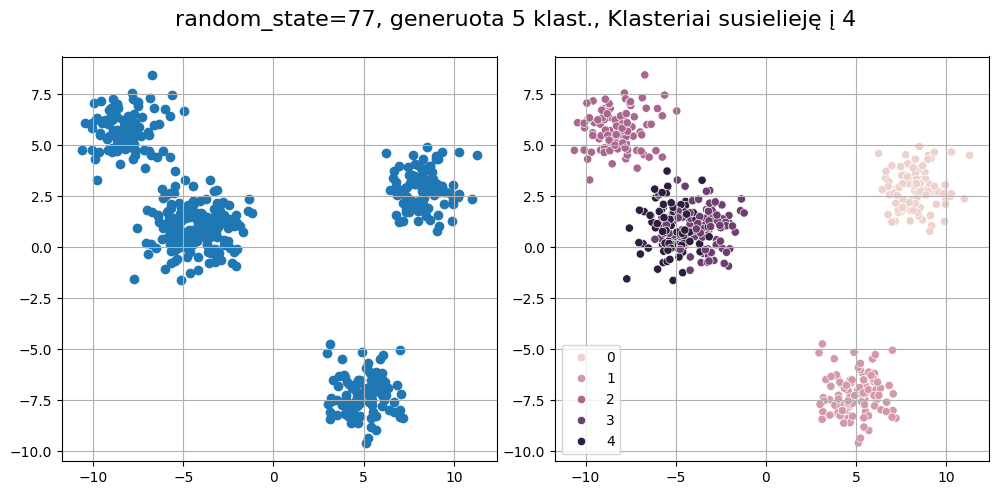

In [3]:
from sklearn.datasets import make_blobs

clasters=5

RandomState=11; coment='Atskiri 5 klasteriai'
RandomState=77; coment='Klasteriai susielieję į 4'
# RandomState=55; coment='Klasteriai susielieję į 3'

X,y = make_blobs(n_samples=500,n_features=2,centers=clasters,
                 random_state=RandomState)

# fig, (ax1, ax2) = plt.subplots(2,gridspec_kw={'height_ratios':[1,1]},figsize=[3,6])
fig, (ax1, ax2) = plt.subplots(1,2,gridspec_kw={'width_ratios':[1,1]},figsize=[10,5])
fig.suptitle(f'random_state={RandomState}, generuota {clasters} klast., {coment}',fontsize=16)
fig.tight_layout()

ax1.scatter(X[:,0], X[:,1])
ax1.grid(True)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=ax2)
ax2.grid(True)

plt.show()

In [4]:
X[0:3]

array([[ 5.36174119, -6.17077151],
       [ 4.13070863, -7.69562345],
       [ 3.98241226, -8.18969812]])

Nurodžiau ieškoti tiek klasterių, kiek nurodyta sukurti (5).
Atliekami 4 bandymai, jei klasteriai susilieja, visų rezultatai skirtingi.


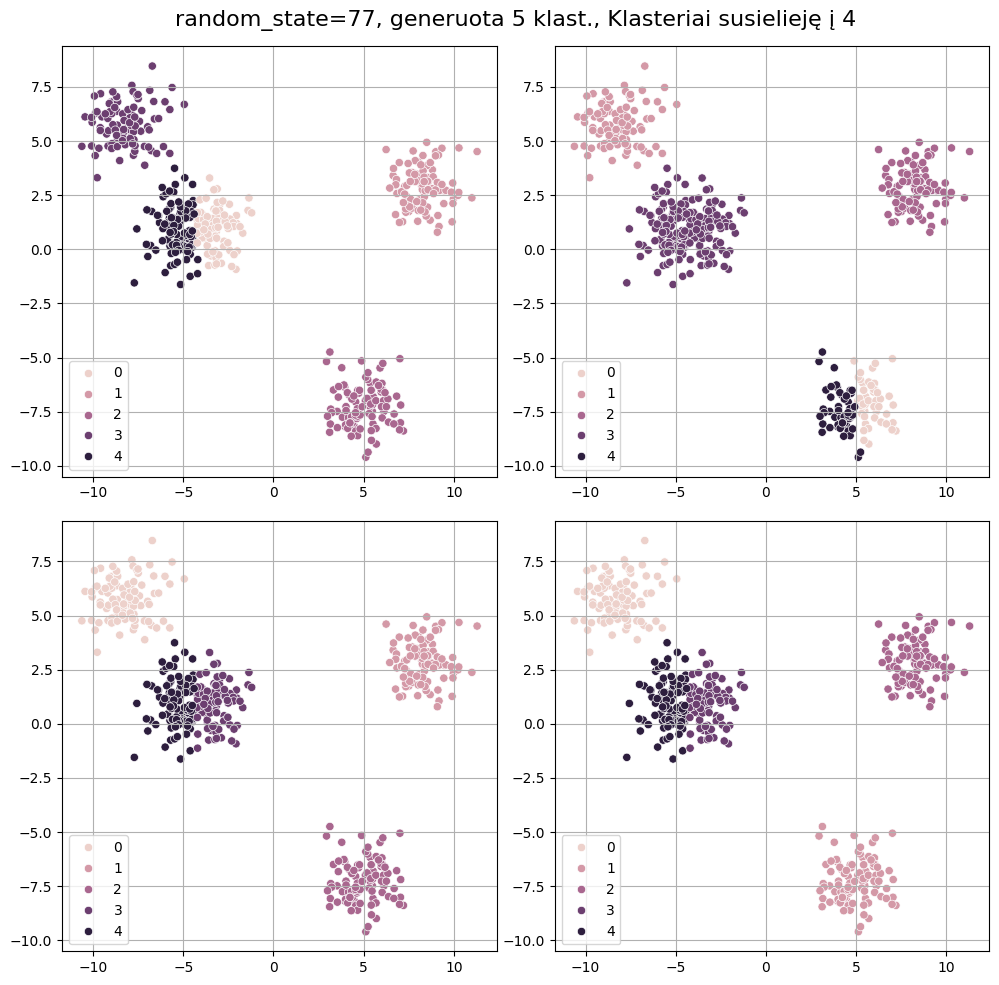

In [ ]:
from sklearn.cluster import KMeans

print(f'Nurodžiau ieškoti tiek klasterių, kiek nurodyta sukurti ({clasters}).')
print(f'Atliekami 4 bandymai, jei klasteriai susilieja, visų rezultatai skirtingi.')
labels00=KMeans(n_clusters=clasters).fit_predict(X)
labels01=KMeans(n_clusters=clasters).fit_predict(X)
labels10=KMeans(n_clusters=clasters).fit_predict(X)
labels11=KMeans(n_clusters=clasters).fit_predict(X)

# fig, (ax1, ax2) = plt.subplots(2,gridspec_kw={'height_ratios':[1,1]},figsize=[3,6])
fig, axs = plt.subplots(2,2,gridspec_kw={'width_ratios':[1,1]},figsize=[10,10])
fig.suptitle(f'random_state={RandomState}, generuota {clasters} klast., {coment}',fontsize=16)
fig.tight_layout()

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels00, ax=axs[0,0])
axs[0,0].grid(True)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels01, ax=axs[0,1])
axs[0,1].grid(True)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels10, ax=axs[1,0])
axs[1,0].grid(True)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels11, ax=axs[1,1])
axs[1,1].grid(True)

plt.show()

2. Nurodau ieškoti 9 klasterių, paprastai randa 6.


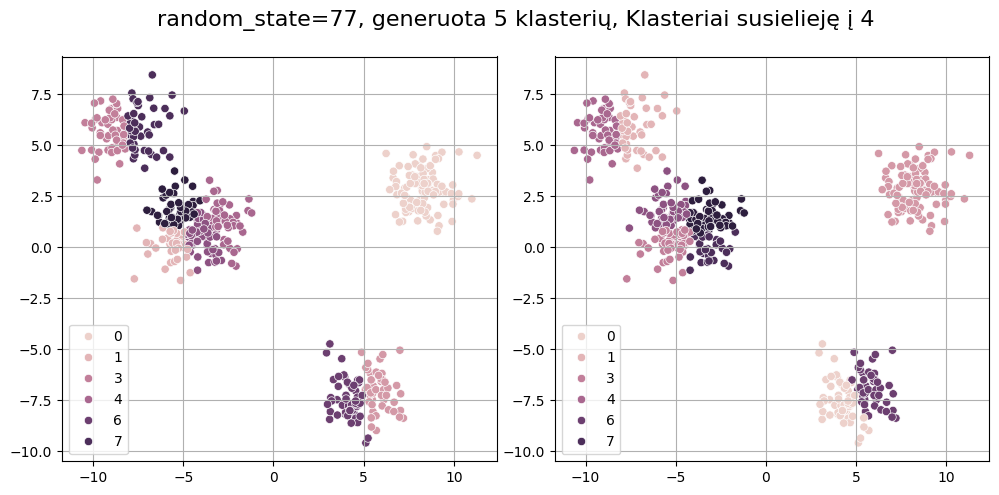

In [6]:
from sklearn.cluster import KMeans

# kmeans=KMeans(n_clusters=3)
# labels=kmeans.fit_predict(X)

print('2. Nurodau ieškoti 9 klasterių, paprastai randa 6.')

fig, (ax1, ax2) = plt.subplots(1,2,gridspec_kw={'width_ratios':[1,1]},figsize=[10,5])
fig.suptitle(f'random_state={RandomState}, generuota {clasters} klasterių, {coment}',fontsize=16)
fig.tight_layout()

labels1=KMeans(n_clusters=9).fit_predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels1, ax=ax1)
ax1.grid(True)

labels2=KMeans(n_clusters=9).fit_predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels2, ax=ax2)
ax2.grid(True)

plt.show()

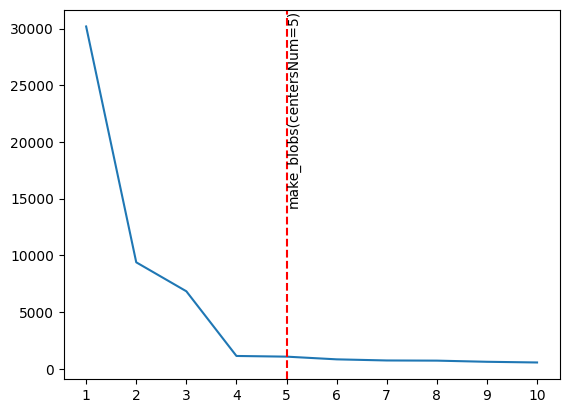

In [7]:
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

ax=sns.lineplot(x=[*range(1,11)],y=sse)
# ax.loglog()

x = list(range(1,11))

# # Pridedame Y reikšmes šalia kiekvieno taško (skaičiai lipa vieni ant kitų)
# for i, value in enumerate(sse):
#     plt.text(x[i], value, str(value), color='blue', va='bottom', ha='center')

ax.axvline(x=clasters, color='red', linestyle='--')

# Pridedame vertikalų tekstą ties nurodyta X reikšme
ax.text(clasters, plt.ylim()[1], f'make_blobs(centersNum={clasters})', verticalalignment='top', rotation=90)

plt.xticks(x)
plt.show()


 sklearn.cluster.DBSCAN 


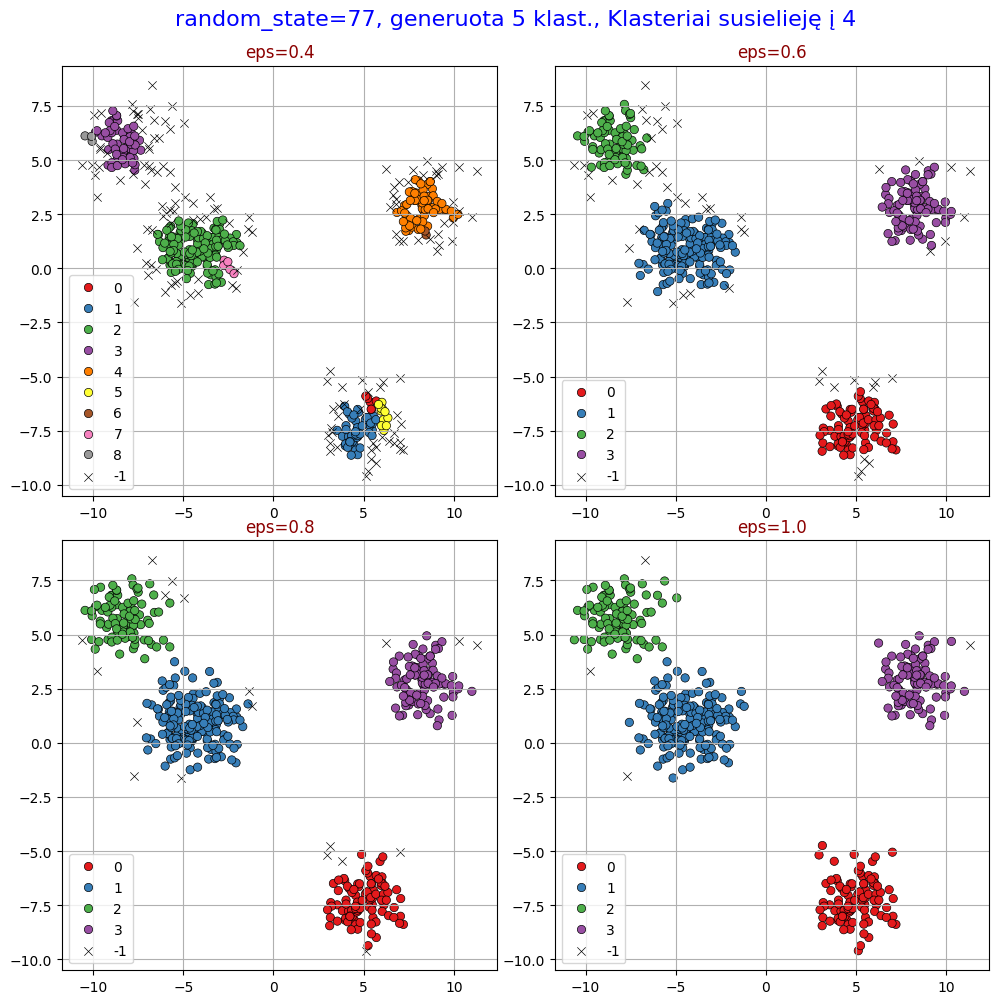

In [28]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print('\n sklearn.cluster.DBSCAN ')

# kmeans=KMeans(n_clusters=3)
# labels=kmeans.fit_predict(X)

# print(f'Nurodžiau ieškoti tiek klasterių, kiek nurodyta sukurti ({clasters}).')
# print(f'Atliekami 4 bandymai, jei klasteriai susilieja, visų rezultatai skirtingi.')
eps = [0.4,0.6,0.8,1.0]

labels=[]
for eps_ in eps:
    labels.append(DBSCAN(eps=eps_, min_samples=5).fit_predict(X))

# fig, (ax1, ax2) = plt.subplots(2,gridspec_kw={'height_ratios':[1,1]},figsize=[3,6])
fig, axs = plt.subplots(2,2,gridspec_kw={'width_ratios':[1,1]},figsize=[10,10])
fig.suptitle(f'random_state={RandomState}, generuota {clasters} klast., {coment}',
             fontsize=16, y=1, color="blue")
fig.tight_layout()

nr=0
# Normalūs taškai (išskyrus -1)
mask_normal = labels[0] != -1
sns.scatterplot(x=X[mask_normal, 0], y=X[mask_normal, 1], hue=labels[0][mask_normal], 
                palette="Set1", marker="o", edgecolor="black", ax=axs[0,0])
# Šiukšlės (-1) žymime 'x'
mask_minus_one = labels[0] == -1
sns.scatterplot(x=X[mask_minus_one, 0], y=X[mask_minus_one, 1],
                 color="black", marker="x", label="-1", ax=axs[0,0])
axs[0,0].grid(True)
axs[0,0].set_title(f"eps={eps[nr]}",color="darkred")

nr=1
# Normalūs taškai (išskyrus -1)
mask_normal = labels[1] != -1
sns.scatterplot(x=X[mask_normal, 0], y=X[mask_normal, 1], hue=labels[1][mask_normal], 
                palette="Set1", marker="o", edgecolor="black", ax=axs[0,1])
# Šiukšlės (-1) žymime 'x'
mask_minus_one = labels[1] == -1
sns.scatterplot(x=X[mask_minus_one, 0], y=X[mask_minus_one, 1], 
                color="black", marker="x", label="-1", ax=axs[0,1])
axs[0,1].grid(True)
axs[0,1].set_title(f"eps={eps[nr]}",color="darkred")

nr=2
# Normalūs taškai (išskyrus -1)
mask_normal = labels[2] != -1
sns.scatterplot(x=X[mask_normal, 0], y=X[mask_normal, 1], hue=labels[2][mask_normal], 
                palette="Set1", marker="o", edgecolor="black", ax=axs[1,0])
# Šiukšlės (-1) žymime 'x'
mask_minus_one = labels[2] == -1
sns.scatterplot(x=X[mask_minus_one, 0], y=X[mask_minus_one, 1], 
                color="black", marker="x", label="-1", ax=axs[1,0])
axs[1,0].grid(True)
axs[1,0].set_title(f"eps={eps[nr]}",color="darkred")

nr=3
# Normalūs taškai (išskyrus -1)
mask_normal = labels[nr] != -1
sns.scatterplot(x=X[mask_normal, 0], y=X[mask_normal, 1], hue=labels[nr][mask_normal], 
                palette="Set1", marker="o", edgecolor="black", ax=axs[1,1])
# Šiukšlės (-1) žymime 'x'
mask_minus_one = labels[nr] == -1
sns.scatterplot(x=X[mask_minus_one, 0], y=X[mask_minus_one, 1], 
                color="black", marker="x", label="-1", ax=axs[1,1])
axs[1,1].grid(True)
# axs[1,1].legend()
axs[1,1].set_title(f"eps={eps[nr]}",color="darkred")

# plt.legend()
plt.show()

############################################
############# Smėlio dėžė ##################
############################################

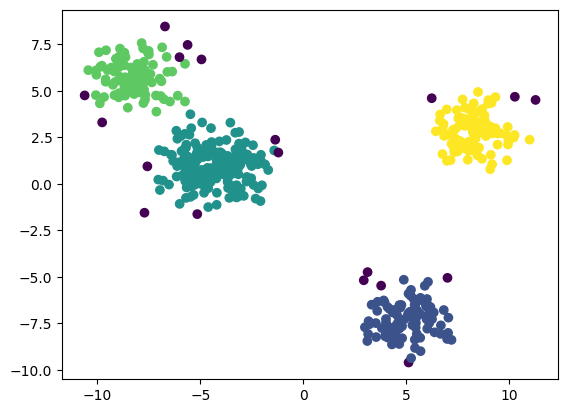

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

from sklearn.cluster import KMeans, DBSCAN
# import seaborn as sns
import matplotlib.pyplot as plt

label = DBSCAN(eps=0.8, min_samples=5).fit_predict(X)
plt.scatter( X[:,0], X[:,1], c=label )

Bandau grafiko parametrus


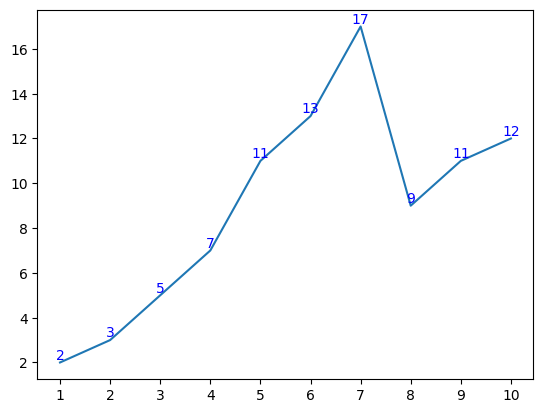

In [12]:
print('Bandau grafiko parametrus')

import matplotlib.pyplot as plt
import seaborn as sns

# Duomenys
x = list(range(1, 11))
y = [2, 3, 5, 7, 11, 13, 17, 9, 11, 12]  # Pavyzdžiui, keletas atsitiktinių skaičių

# Braižome linijinę diagramą
ax = sns.lineplot(x=x, y=y)

# Pridedame Y reikšmes šalia kiekvieno taško
for i, value in enumerate(y):
    plt.text(x[i], value, str(value), color='blue', va='bottom', ha='center')

# Nustatome X ašies žymes
plt.xticks(x)

# Rodyti diagramą
plt.show()
